In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


#part1a
sigma=1
rho=0.2
u1=np.array([0,0])
u2=np.array([1,1])
cov=np.array([[sigma**2,rho*sigma**2],[rho*sigma**2,sigma**2]])
print('cov',cov)

nlist=np.linspace(20,100,num=9)

test_error=np.zeros(len(nlist))
err_lda=np.zeros(len(nlist))

count=0
score_avg=np.zeros([len(nlist),3])
for train_n in range(0,len(nlist)) :
    score=[0,0,0]
    conf_matrix=np.float64(([0,0],[0,0])*3)
    for rep_i in range(0,1000):

        #import pdb; pdb.set_trace()
        #create sample two guassian distributions for each mean training data
        x1_train=np.random.multivariate_normal(u1,cov,int(nlist[train_n]/2))
        y1_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y1_train[i]=0
        x2_train=np.random.multivariate_normal(u2,cov,int(nlist[train_n]/2))
        y2_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y2_train[i]=1
            
        X_train=np.concatenate((x1_train,x2_train),axis=0)
        Y_train=np.concatenate((y1_train,y2_train),axis=0)
         
        # generate test set 
        x1_test=np.random.multivariate_normal(u1,cov,200)
        y1_test=np.zeros(200)
        for i in range (0,200):
            y1_test[i]=0
        x2_test=np.random.multivariate_normal(u2,cov,200)
        y2_test=np.zeros(200)
        for i in range (0,200):
            y2_test[i]=1
        
        X_test=np.concatenate((x1_test,x2_test),axis=0)
        Y_test=np.concatenate((y1_test,y2_test),axis=0)
        
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score[0]+=model1.score(X_test,Y_test)
        score[1]+=model2.score(X_test,Y_test)
        score[2]+=model3.score(X_test,Y_test)
        conf_matrix[0:2][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred1),200)
        conf_matrix[2:4][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred2),200)
        conf_matrix[4:6][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred3),200)

    #average the accuracy and conf matrix
    for modelcount in range (0,3):
        print(score)
        score_avg[count,modelcount]=score[modelcount]/1000
        
        print('scoreavg',modelcount,score_avg[count,modelcount])
    count+=1
        #np.append(conf_matrix_avg[modelcount],np.divide(conf_matrix[modelcount],1000), axis=0)


cov [[1.  0.2]
 [0.2 1. ]]
[714.0849999999974, 688.6650000000003, 673.0324999999997]
scoreavg 0 0.7140849999999974
[714.0849999999974, 688.6650000000003, 673.0324999999997]
scoreavg 1 0.6886650000000003
[714.0849999999974, 688.6650000000003, 673.0324999999997]
scoreavg 2 0.6730324999999997
[722.9525000000006, 703.9200000000001, 679.7474999999995]
scoreavg 0 0.7229525000000006
[722.9525000000006, 703.9200000000001, 679.7474999999995]
scoreavg 1 0.7039200000000001
[722.9525000000006, 703.9200000000001, 679.7474999999995]
scoreavg 2 0.6797474999999995
[727.6049999999984, 709.5599999999994, 678.8874999999991]
scoreavg 0 0.7276049999999984
[727.6049999999984, 709.5599999999994, 678.8874999999991]
scoreavg 1 0.7095599999999994
[727.6049999999984, 709.5599999999994, 678.8874999999991]
scoreavg 2 0.6788874999999991
[732.2525000000014, 715.4950000000007, 681.3250000000003]
scoreavg 0 0.7322525000000014
[732.2525000000014, 715.4950000000007, 681.3250000000003]
scoreavg 1 0.7154950000000007
[732.

In [67]:
conf_matrix=np.float64(([0,0],[0,0])*3)
score_avg.shape

(9, 3)

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


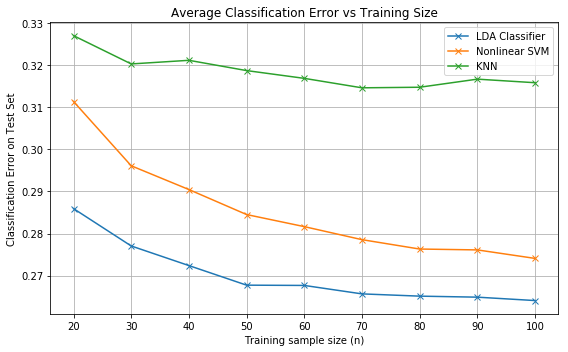

In [69]:
#plot error vs n
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avg[:,0],marker='x',label='LDA Classifier')
plt.plot(nlist,1-score_avg[:,1],marker='x',label='Nonlinear SVM')
plt.plot(nlist,1-score_avg[:,2],marker='x',label='KNN')
plt.hold(True)
plt.title('Average Classification Error vs Training Size')
plt.ylabel('Classification Error on Test Set')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_1a.png')

In [70]:
#part1a
sigma=2
rho=0.2
u1=np.array([0,0])
u2=np.array([1,1])
cov=np.array([[sigma**2,rho*sigma**2],[rho*sigma**2,sigma**2]])
print('cov',cov)

nlist=np.linspace(20,100,num=9)

test_error=np.zeros(len(nlist))
err_lda=np.zeros(len(nlist))

count=0
score_avg=np.zeros([len(nlist),3])
for train_n in range(0,len(nlist)) :
    score=[0,0,0]
    conf_matrix=np.float64(([0,0],[0,0])*3)
    for rep_i in range(0,1000):

        #import pdb; pdb.set_trace()
        #create sample two guassian distributions for each mean training data
        x1_train=np.random.multivariate_normal(u1,cov,int(nlist[train_n]/2))
        y1_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y1_train[i]=0
        x2_train=np.random.multivariate_normal(u2,cov,int(nlist[train_n]/2))
        y2_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y2_train[i]=1
            
        X_train=np.concatenate((x1_train,x2_train),axis=0)
        Y_train=np.concatenate((y1_train,y2_train),axis=0)
         
        # generate test set 
        x1_test=np.random.multivariate_normal(u1,cov,200)
        y1_test=np.zeros(200)
        for i in range (0,200):
            y1_test[i]=0
        x2_test=np.random.multivariate_normal(u2,cov,200)
        y2_test=np.zeros(200)
        for i in range (0,200):
            y2_test[i]=1
        
        X_test=np.concatenate((x1_test,x2_test),axis=0)
        Y_test=np.concatenate((y1_test,y2_test),axis=0)
        
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score[0]+=model1.score(X_test,Y_test)
        score[1]+=model2.score(X_test,Y_test)
        score[2]+=model3.score(X_test,Y_test)
        conf_matrix[0:2][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred1),200)
        conf_matrix[2:4][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred2),200)
        conf_matrix[4:6][0:2]+=np.divide(confusion_matrix(Y_test, Y_pred3),200)

    #average the accuracy and conf matrix
    for modelcount in range (0,3):
        print(score)
        score_avg[count,modelcount]=score[modelcount]/1000
        
        print('scoreavg',modelcount,score_avg[count,modelcount])
    count+=1
        #np.append(conf_matrix_avg[modelcount],np.divide(conf_matrix[modelcount],1000), axis=0)


cov [[4.  0.8]
 [0.8 4. ]]
[583.6624999999991, 542.4375000000008, 555.1675]
scoreavg 0 0.5836624999999991
[583.6624999999991, 542.4375000000008, 555.1675]
scoreavg 1 0.5424375000000008
[583.6624999999991, 542.4375000000008, 555.1675]
scoreavg 2 0.5551675
[598.1074999999998, 552.5524999999999, 559.8300000000002]
scoreavg 0 0.5981074999999998
[598.1074999999998, 552.5524999999999, 559.8300000000002]
scoreavg 1 0.5525524999999999
[598.1074999999998, 552.5524999999999, 559.8300000000002]
scoreavg 2 0.5598300000000002
[606.775, 559.5799999999997, 562.0499999999997]
scoreavg 0 0.606775
[606.775, 559.5799999999997, 562.0499999999997]
scoreavg 1 0.5595799999999997
[606.775, 559.5799999999997, 562.0499999999997]
scoreavg 2 0.5620499999999997
[612.0074999999998, 566.1625000000001, 563.8750000000005]
scoreavg 0 0.6120074999999998
[612.0074999999998, 566.1625000000001, 563.8750000000005]
scoreavg 1 0.5661625000000001
[612.0074999999998, 566.1625000000001, 563.8750000000005]
scoreavg 2 0.5638750000

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


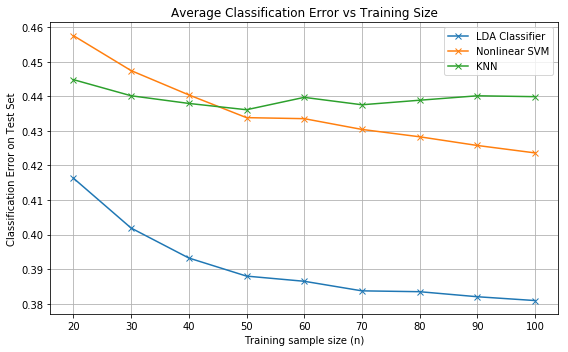

In [71]:
#plot error vs n
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avg[:,0],marker='x',label='LDA Classifier')
plt.plot(nlist,1-score_avg[:,1],marker='x',label='Nonlinear SVM')
plt.plot(nlist,1-score_avg[:,2],marker='x',label='KNN')
plt.hold(True)
plt.title('Average Classification Error vs Training Size')
plt.ylabel('Classification Error on Test Set')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_11a.png')

cov [[1.  0.2]
 [0.2 1. ]]
count of n 1
score kf [[0.59785 0.48825 0.56155]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]]
score loo [[0.6925 0.6485 0.6521]
 [0.     0.     0.    ]
 [0.     0.     0.    ]
 [0.     0.     0.    ]
 [0.     0.     0.    ]
 [0.     0.     0.    ]
 [0.     0.     0.    ]
 [0.     0.     0.    ]
 [0.     0.     0.    ]]
score avg [[0.76935 0.8246  0.8184 ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]]
score avg [[0.716375  0.6917125 0.6794275]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.    

count of n 8
score kf [[0.59785    0.48825    0.56155   ]
 [0.60053333 0.5233     0.568     ]
 [0.6065     0.536825   0.576625  ]
 [0.60976    0.5474     0.57588   ]
 [0.6145     0.55973333 0.58565   ]
 [0.61821429 0.56921429 0.58587143]
 [0.6120625  0.5665875  0.5811    ]
 [0.61988889 0.57577778 0.58855556]
 [0.         0.         0.        ]]
score loo [[0.6925     0.6485     0.6521    ]
 [0.70466667 0.67476667 0.6633    ]
 [0.712125   0.689325   0.66595   ]
 [0.72078    0.69972    0.66722   ]
 [0.72305    0.7092     0.67575   ]
 [0.72601429 0.71288571 0.67862857]
 [0.7250625  0.712475   0.67545   ]
 [0.73046667 0.71924444 0.68096667]
 [0.         0.         0.        ]]
score avg [[0.76935    0.8246     0.8184    ]
 [0.75853333 0.8045     0.82406667]
 [0.749025   0.7915     0.819825  ]
 [0.74988    0.78326    0.82206   ]
 [0.74835    0.77993333 0.82425   ]
 [0.7475     0.77681429 0.82478571]
 [0.74345    0.7692875  0.8226    ]
 [0.74691111 0.77128889 0.8257    ]
 [0.         0.     

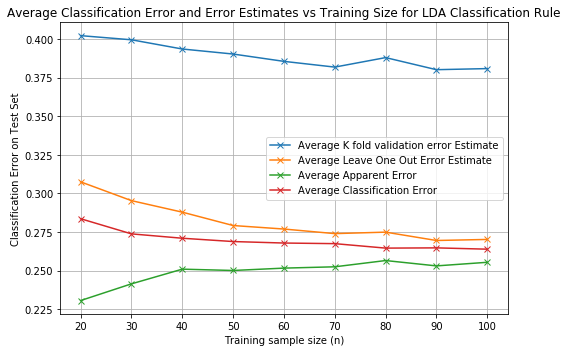

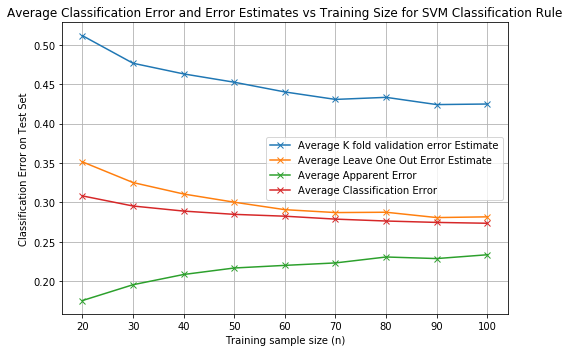

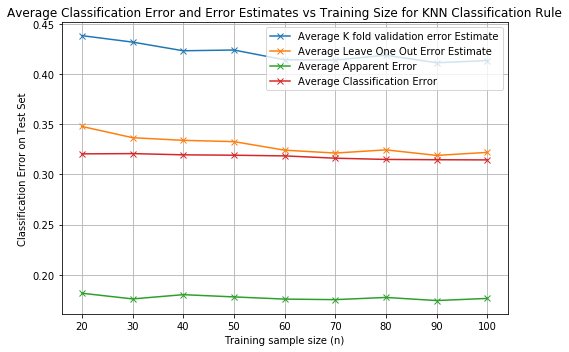

In [106]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

#part1a
sigma=1
rho=0.2
u1=np.array([0,0])
u2=np.array([1,1])
cov=np.array([[sigma**2,rho*sigma**2],[rho*sigma**2,sigma**2]])
print('cov',cov)

nlist=np.linspace(20,100,num=9)

test_error=np.zeros(len(nlist))
err_lda=np.zeros(len(nlist))

count=0
score_avg=np.zeros([len(nlist),3])
score_avgkf=np.zeros([len(nlist),3])
score_avgloo=np.zeros([len(nlist),3])
score_avgcl=np.zeros([len(nlist),3])
for train_n in range(0,len(nlist)) :
    scorekf=[0,0,0]
    scoreloo=[0,0,0]
    score=[0,0,0]
    score_cl=[0,0,0]
    #import pdb; pdb.set_trace()
    for rep_i in range(0,1000):

        #import pdb; pdb.set_trace()
        #create sample two guassian distributions for each mean training data
        x1_train=np.random.multivariate_normal(u1,cov,int(nlist[train_n]/2))
        y1_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y1_train[i]=0
        x2_train=np.random.multivariate_normal(u2,cov,int(nlist[train_n]/2))
        y2_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y2_train[i]=1
            
        X_train=np.concatenate((x1_train,x2_train),axis=0)
        Y_train=np.concatenate((y1_train,y2_train),axis=0)
         
        # generate test set 
        x1_test=np.random.multivariate_normal(u1,cov,200)
        y1_test=np.zeros(200)
        for i in range (0,200):
            y1_test[i]=0
        x2_test=np.random.multivariate_normal(u2,cov,200)
        y2_test=np.zeros(200)
        for i in range (0,200):
            y2_test[i]=1
        
        X_test=np.concatenate((x1_test,x2_test),axis=0)
        Y_test=np.concatenate((y1_test,y2_test),axis=0)
            
        #kfold validation error estimate
        kf = KFold(n_splits=5)
        kf.get_n_splits(X_train)
        KFold(n_splits=5, random_state=None, shuffle=True)
        for train_index, test_index in kf.split(X_train):
            X_trainkf, X_testkf = X_train[train_index], X_train[test_index]
            Y_trainkf, Y_testkf = Y_train[train_index], Y_train[test_index]          
        
            #model1
            model1 = LinearDiscriminantAnalysis()
            model1.fit(X_trainkf, Y_trainkf)
            LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
            solver='svd', store_covariance=False, tol=0.0001)
            Y_pred1=model1.predict(X_testkf)

            #model2
            model2 = SVC(gamma='auto')
            model2.fit(X_trainkf, Y_trainkf)
            SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
            Y_pred2=model2.predict(X_testkf)

            #model2
            model3 = KNeighborsClassifier(n_neighbors=3)
            model3.fit(X_trainkf, Y_trainkf)
            KNeighborsClassifier(...)
            Y_pred3=model3.predict(X_testkf)     
        
            #acccuracy for this iteration
            scorekf[0]+=model1.score(X_testkf,Y_testkf)
            scorekf[1]+=model2.score(X_testkf,Y_testkf)
            scorekf[2]+=model3.score(X_testkf,Y_testkf)
            
        #import pdb; pdb.set_trace()
        
        
        # leave one out error estimate
        loo = LeaveOneOut()
        loo.get_n_splits(X_train)

        LeaveOneOut()
        for train_index, test_index in loo.split(X_train):
            X_trainloo, X_testloo = X_train[train_index], X_train[test_index]
            Y_trainloo, Y_testloo = Y_train[train_index], Y_train[test_index]
            
            #model1
            model1 = LinearDiscriminantAnalysis()
            model1.fit(X_trainloo, Y_trainloo)
            LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
            solver='svd', store_covariance=False, tol=0.0001)
            Y_pred1=model1.predict(X_testloo)

            #model2
            model2 = SVC(gamma='auto')
            model2.fit(X_trainloo, Y_trainloo)
            SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
            Y_pred2=model2.predict(X_testloo)

            #model2
            model3 = KNeighborsClassifier(n_neighbors=3)
            model3.fit(X_trainloo, Y_trainloo)
            KNeighborsClassifier(...)
            Y_pred3=model3.predict(X_testloo)     
        
            #acccuracy for this iteration
            scoreloo[0]+=model1.score(X_testloo,Y_testloo)
            scoreloo[1]+=model2.score(X_testloo,Y_testloo)
            scoreloo[2]+=model3.score(X_testloo,Y_testloo)
        
        
        # average apparent error
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score[0]+=model1.score(X_train,Y_train)
        score[1]+=model2.score(X_train,Y_train)
        score[2]+=model3.score(X_train,Y_train)
        
        # average classification error
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score_cl[0]+=model1.score(X_test,Y_test)
        score_cl[1]+=model2.score(X_test,Y_test)
        score_cl[2]+=model3.score(X_test,Y_test)
    
    #average across k folds
    scorekf=np.divide(scorekf,5)  
    #average leave one out error estimate
    scoreloo=np.divide(scoreloo,int(nlist[train_n]))
    
    #average the accuracy for kf,loo,and average classification error
    for modelcount in range (0,3):
        score_avgkf[count,modelcount]=scorekf[modelcount]/1000
        score_avgloo[count,modelcount]=scoreloo[modelcount]/1000
        score_avg[count,modelcount]=score[modelcount]/1000
        score_avgcl[count,modelcount]=score_cl[modelcount]/1000
                      
    count+=1
    print ('count of n',count)
    print ('score kf',score_avgkf)
    print('score loo',score_avgloo)
    print('score avg',score_avg)
    print('score avg',score_avgcl)

#plot error curves for LDA
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,0],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,0],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,0],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,0],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for LDA Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_14b.png')
                      
#plot error curves for SVM
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,1],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,1],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,1],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,1],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for SVM Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_15b.png')
                      
#plot error curves for KNN
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,2],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,2],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,2],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,2],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for KNN Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_16b.png')

cov [[4.  0.8]
 [0.8 4. ]]
count of n 1
score kf [[0.37915 0.2659  0.4081 ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]]
score loo [[0.51465 0.45365 0.51855]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]]
score avg [[0.66725 0.87095 0.75975]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]
 [0.      0.      0.     ]]
score avg [[0.5850225 0.5435975 0.5558825]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.       ]
 [0.        0.        0.

count of n 8
score kf [[0.37915    0.2659     0.4081    ]
 [0.37093333 0.2935     0.41946667]
 [0.373475   0.302225   0.42015   ]
 [0.37512    0.31006    0.42372   ]
 [0.3615     0.31091667 0.42218333]
 [0.36842857 0.31951429 0.42804286]
 [0.371225   0.3233625  0.4258625 ]
 [0.37271111 0.32636667 0.42763333]
 [0.         0.         0.        ]]
score loo [[0.51465    0.45365    0.51855   ]
 [0.54993333 0.50176667 0.53506667]
 [0.573375   0.52335    0.539675  ]
 [0.5855     0.53636    0.54992   ]
 [0.58616667 0.5413     0.54758333]
 [0.59504286 0.55318571 0.55492857]
 [0.600725   0.5561     0.5523125 ]
 [0.60526667 0.5625     0.55468889]
 [0.         0.         0.        ]]
score avg [[0.66725    0.87095    0.75975   ]
 [0.65463333 0.84006667 0.76326667]
 [0.65005    0.8131     0.76875   ]
 [0.64464    0.79598    0.7696    ]
 [0.63685    0.77876667 0.76825   ]
 [0.63767143 0.7699     0.7709    ]
 [0.6362     0.75865    0.771625  ]
 [0.63604444 0.75071111 0.77153333]
 [0.         0.     

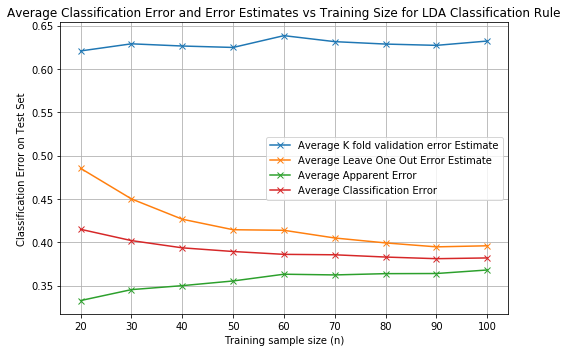

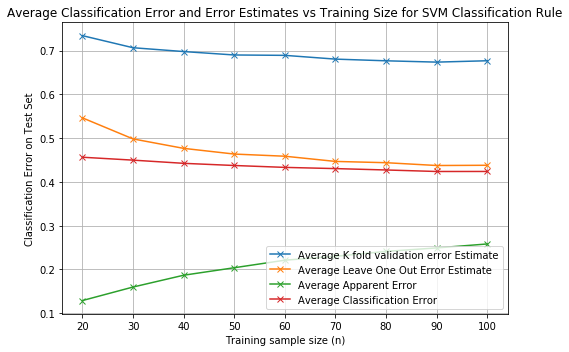

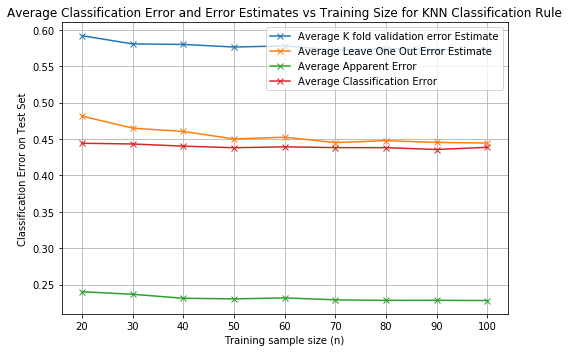

In [107]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

#part1a
sigma=2
rho=0.2
u1=np.array([0,0])
u2=np.array([1,1])
cov=np.array([[sigma**2,rho*sigma**2],[rho*sigma**2,sigma**2]])
print('cov',cov)

nlist=np.linspace(20,100,num=9)

test_error=np.zeros(len(nlist))
err_lda=np.zeros(len(nlist))

count=0
score_avg=np.zeros([len(nlist),3])
score_avgkf=np.zeros([len(nlist),3])
score_avgloo=np.zeros([len(nlist),3])
score_avgcl=np.zeros([len(nlist),3])
for train_n in range(0,len(nlist)) :
    scorekf=[0,0,0]
    scoreloo=[0,0,0]
    score=[0,0,0]
    score_cl=[0,0,0]
    #import pdb; pdb.set_trace()
    for rep_i in range(0,1000):

        #import pdb; pdb.set_trace()
        #create sample two guassian distributions for each mean training data
        x1_train=np.random.multivariate_normal(u1,cov,int(nlist[train_n]/2))
        y1_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y1_train[i]=0
        x2_train=np.random.multivariate_normal(u2,cov,int(nlist[train_n]/2))
        y2_train=np.zeros(int(nlist[train_n]/2))
        for i in range (0,int(nlist[train_n]/2)):
            y2_train[i]=1
            
        X_train=np.concatenate((x1_train,x2_train),axis=0)
        Y_train=np.concatenate((y1_train,y2_train),axis=0)
         
        # generate test set 
        x1_test=np.random.multivariate_normal(u1,cov,200)
        y1_test=np.zeros(200)
        for i in range (0,200):
            y1_test[i]=0
        x2_test=np.random.multivariate_normal(u2,cov,200)
        y2_test=np.zeros(200)
        for i in range (0,200):
            y2_test[i]=1
        
        X_test=np.concatenate((x1_test,x2_test),axis=0)
        Y_test=np.concatenate((y1_test,y2_test),axis=0)
            
        #kfold validation error estimate
        kf = KFold(n_splits=5)
        kf.get_n_splits(X_train)
        KFold(n_splits=5, random_state=None, shuffle=True)
        for train_index, test_index in kf.split(X_train):
            X_trainkf, X_testkf = X_train[train_index], X_train[test_index]
            Y_trainkf, Y_testkf = Y_train[train_index], Y_train[test_index]          
        
            #model1
            model1 = LinearDiscriminantAnalysis()
            model1.fit(X_trainkf, Y_trainkf)
            LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
            solver='svd', store_covariance=False, tol=0.0001)
            Y_pred1=model1.predict(X_testkf)

            #model2
            model2 = SVC(gamma='auto')
            model2.fit(X_trainkf, Y_trainkf)
            SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
            Y_pred2=model2.predict(X_testkf)

            #model2
            model3 = KNeighborsClassifier(n_neighbors=3)
            model3.fit(X_trainkf, Y_trainkf)
            KNeighborsClassifier(...)
            Y_pred3=model3.predict(X_testkf)     
        
            #acccuracy for this iteration
            scorekf[0]+=model1.score(X_testkf,Y_testkf)
            scorekf[1]+=model2.score(X_testkf,Y_testkf)
            scorekf[2]+=model3.score(X_testkf,Y_testkf)
            
        #import pdb; pdb.set_trace()
        
        
        # leave one out error estimate
        loo = LeaveOneOut()
        loo.get_n_splits(X_train)

        LeaveOneOut()
        for train_index, test_index in loo.split(X_train):
            X_trainloo, X_testloo = X_train[train_index], X_train[test_index]
            Y_trainloo, Y_testloo = Y_train[train_index], Y_train[test_index]
            
            #model1
            model1 = LinearDiscriminantAnalysis()
            model1.fit(X_trainloo, Y_trainloo)
            LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
            solver='svd', store_covariance=False, tol=0.0001)
            Y_pred1=model1.predict(X_testloo)

            #model2
            model2 = SVC(gamma='auto')
            model2.fit(X_trainloo, Y_trainloo)
            SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
            Y_pred2=model2.predict(X_testloo)

            #model2
            model3 = KNeighborsClassifier(n_neighbors=3)
            model3.fit(X_trainloo, Y_trainloo)
            KNeighborsClassifier(...)
            Y_pred3=model3.predict(X_testloo)     
        
            #acccuracy for this iteration
            scoreloo[0]+=model1.score(X_testloo,Y_testloo)
            scoreloo[1]+=model2.score(X_testloo,Y_testloo)
            scoreloo[2]+=model3.score(X_testloo,Y_testloo)
        
        
        # average apparent error
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score[0]+=model1.score(X_train,Y_train)
        score[1]+=model2.score(X_train,Y_train)
        score[2]+=model3.score(X_train,Y_train)
        
        # average classification error
        #model1
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)
        Y_pred1=model1.predict(X_test)
        
        #model2
        model2 = SVC(gamma='auto')
        model2.fit(X_train, Y_train)
        SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
        Y_pred2=model2.predict(X_test)
        
        #model2
        model3 = KNeighborsClassifier(n_neighbors=3)
        model3.fit(X_train, Y_train)
        KNeighborsClassifier(...)
        Y_pred3=model3.predict(X_test)     
        
        
        #acccuracy for this iteration
        score_cl[0]+=model1.score(X_test,Y_test)
        score_cl[1]+=model2.score(X_test,Y_test)
        score_cl[2]+=model3.score(X_test,Y_test)
    
    #average across k folds
    scorekf=np.divide(scorekf,5)  
    #average leave one out error estimate
    scoreloo=np.divide(scoreloo,int(nlist[train_n]))
    
    #average the accuracy for kf,loo,and average classification error
    for modelcount in range (0,3):
        score_avgkf[count,modelcount]=scorekf[modelcount]/1000
        score_avgloo[count,modelcount]=scoreloo[modelcount]/1000
        score_avg[count,modelcount]=score[modelcount]/1000
        score_avgcl[count,modelcount]=score_cl[modelcount]/1000
                      
    count+=1
    print ('count of n',count)
    print ('score kf',score_avgkf)
    print('score loo',score_avgloo)
    print('score avg',score_avg)
    print('score avg',score_avgcl)



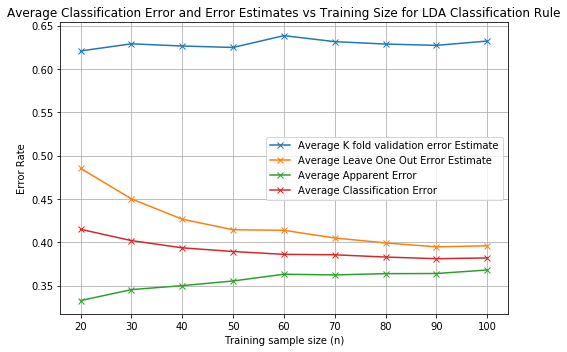

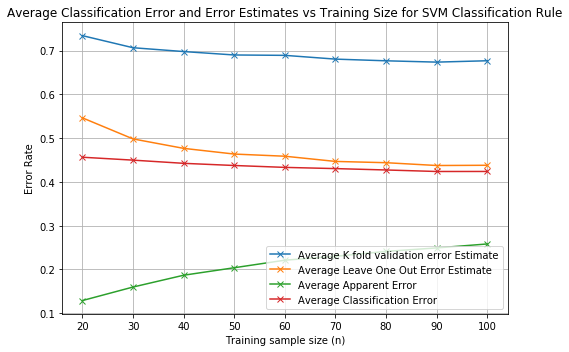

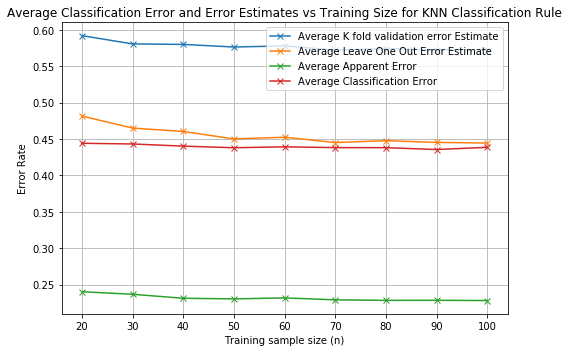

In [108]:
#plot error curves for LDA
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,0],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,0],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,0],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,0],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for LDA Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_17b.png')
                      
#plot error curves for SVM
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,1],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,1],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,1],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,1],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for SVM Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_18b.png')
                      
#plot error curves for KNN
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(nlist,1-score_avgkf[:,2],marker='x',label='Average K fold validation error Estimate')
plt.plot(nlist,1-score_avgloo[:,2],marker='x',label='Average Leave One Out Error Estimate')
plt.plot(nlist,1-score_avg[:,2],marker='x',label='Average Apparent Error')
plt.plot(nlist,1-score_avgcl[:,2],marker='x',label='Average Classification Error')
plt.title('Average Classification Error and Error Estimates vs Training Size for KNN Classification Rule')
plt.ylabel('Error Rate')
plt.xlabel('Training sample size (n)')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2_19b.png')